### Group A

####  Abhishek Naithani - c0871411
#### Karishma Shirsath - c0871245
#### Tejaswi Kalla - c0852124
#### Venkata Sai Charan Yerapasetty - c0863224
#### Joel Jerald Crasto -c0883863

### Libraries Used

In [136]:
import csv
from datetime import date
import pandas as pd
import numpy as np
import seaborn as sns
import snscrape.modules.twitter as sntwitter
import matplotlib.pyplot as plt
import time
from textblob import TextBlob
import re 
import string
import emoji
import demoji
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")

In [5]:
tweets = []
twitter_profile_url = "https://twitter.com/"

In [6]:
count = 0
sleep_time = 10

### 1.Scrapping the Twitter data using Snscrape

In [10]:

hashtag_list = [
    "Altcoin",
    "Bitcoin",
    "Coindesk",
    "Cryptocurrency",
    "Gold",
    "GOOG",
    "APPL",
    "YHOO"
]

tweet_limit = 200  # Set the desired limit of tweets per hashtag
tweets = []  # Initialize an empty list to store the tweets

for hashtag_query in hashtag_list:
    count = 0  # Initialize a count variable for each hashtag
    
    for tweet in sntwitter.TwitterSearchScraper(hashtag_query).get_items():
        if count == tweet_limit:  # Stop when the limit is reached for the current hashtag
            break
        else:
            if tweet.lang == 'en':
                count += 1
                tweets.append([
                    tweet.date,
                    tweet.content,
                    tweet.user.username,
                    tweet.tweetid
                ])


In [7]:
df = pd.DataFrame(tweets, columns=[
    'date',
    'tweet_content'
    'user_name',
    'id'
])


In [9]:
df.to_csv('Twitter_data.csv') # saved the scraped data into csv

In [137]:
df = pd.read_csv('Twitter_data.csv') # called the same csv file

In [138]:
df.head()

,Unnamed: 0,date,tweet_content,user_name,id
0,0,2023-06-24 03:08:26+00:00,Operating on the Binance Smart Chain network a...,AIDtokenF,ID
1,1,2023-06-24 03:07:16+00:00,@unicorn_in72340 Hey!! They seem like a good p...,AltcoinGem1000X,1.63E+18
2,2,2023-06-24 03:06:42+00:00,@BushidoMoney Hey!! They seem like a good proj...,AltcoinGem1000X,1.63E+18
3,3,2023-06-26 03:06:17+00:00,@BushidoMoney Hey!! They seem like a good proj...,AltcoinGem1000X,1.63E+18
4,4,2023-06-26 03:04:28+00:00,@Xeenon_xyz @Titan_Node Hey!! They seem like a...,AltcoinGem1000X,1.63E+18


In [139]:
df.tail()

,Unnamed: 0,date,tweet_content,user_name,id
1302,1302,2023-02-26 19:14:56+00:00,How Many Bitcoin to be a MILLIONAIRE? 🐳 https:...,BlockchainedX,1.63E+18
1303,1303,2023-02-26 19:14:36+00:00,Take your trading skills to the next level\n\n...,davistrade_com,1.63E+18
1304,1304,2023-02-26 19:14:23+00:00,#Crypto market is replacing one central bank w...,AmazingMuha,1.63E+18
1305,1305,2023-02-26 19:14:01+00:00,"De Winnaar van €250,-! Bitcoin $BTC &amp; Ethe...",BullsBears2009,1.63E+18
1306,1306,2023-02-26 19:13:47+00:00,THE VULCAN BLOCKCHAIN: WHAT IS THE VULCAN BLOC...,0xJayson09,1.63E+18


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1307 non-null   int64 
 1   date           1305 non-null   object
 2   tweet_content  1305 non-null   object
 3   user_name      1303 non-null   object
 4   id             1307 non-null   object
dtypes: int64(1), object(4)
memory usage: 51.2+ KB


### 2.Categorized the tweet as per the tweet_content to convert the one csv into multiple ones

In [141]:
import pandas as pd
import numpy as np

def categorize_tweet_type(row):
    tweet_text = row['tweet_content']
    username = row['user_name']
    
    if pd.isna(tweet_text):
        tweet_text = ''
    else:
        tweet_text = tweet_text.lower()
        
    if pd.isna(username):
        username = ''
    else:
        username = username.lower()

    if 'altcoin' in tweet_text or 'altcoin' in username:
        return 'Altcoin'
    elif 'bitcoin' in tweet_text or 'bitcoin' in username:
        return 'Bitcoin'
    elif 'gold' in tweet_text or 'gold' in username:
        return 'Gold'
    elif 'appl' in tweet_text or 'appl' in username:
        return 'APPL'
    elif 'yhoo' in tweet_text or 'yhoo' in username:
        return 'YHOO'
    elif 'coindesk' in tweet_text or 'coindesk' in username:
        return 'Coindesk'
    elif 'cryptocurrency' in tweet_text or 'cryptocurrency' in username:
        return 'Cryptocurrency'
    elif 'goog' in tweet_text or 'goog' in username:
        return 'GOOG'

    return None  

#Created a new column "Tweet Category"
df['Tweet Category'] = df.apply(categorize_tweet_type, axis=1)


In [142]:
df.head(5)

,Unnamed: 0,date,tweet_content,user_name,id,Tweet Category
0,0,2023-06-24 03:08:26+00:00,Operating on the Binance Smart Chain network a...,AIDtokenF,ID,Altcoin
1,1,2023-06-24 03:07:16+00:00,@unicorn_in72340 Hey!! They seem like a good p...,AltcoinGem1000X,1.63E+18,Altcoin
2,2,2023-06-24 03:06:42+00:00,@BushidoMoney Hey!! They seem like a good proj...,AltcoinGem1000X,1.63E+18,Altcoin
3,3,2023-06-26 03:06:17+00:00,@BushidoMoney Hey!! They seem like a good proj...,AltcoinGem1000X,1.63E+18,Altcoin
4,4,2023-06-26 03:04:28+00:00,@Xeenon_xyz @Titan_Node Hey!! They seem like a...,AltcoinGem1000X,1.63E+18,Altcoin


In [143]:
unique_categories = df['Tweet Category'].unique()

for category in unique_categories:
    subset = df[df['Tweet Category'] == category]
    
    # Save the subset as a new CSV file
    subset.to_csv(f'{category}.csv', index=False)

<div class="alert alert-block alert-info">

Above we have divided the data into different csv files by using the newly created column Tweet Category
    
</div>

### 3.Data Cleaning

In [144]:
df.duplicated().sum() #checking for duplicates

0

In [145]:
text_total = " ".join(df["tweet_content"].astype(str))

In [146]:
len(text_total) # Length of text 

170984

In [147]:
df_new = df.copy()

<div class="alert alert-block alert-info">
    
By Using the below function "cleaning_text" we have cleaned the "tweet_content" column 
    
</div>

In [148]:
def cleaning_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert text to lowercase
        text = re.sub(r'\[.*?\]', '', text)  # Remove square brackets
        text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
        text = re.sub(r'[^\w\s]', '', text)  # Remove alphanumeric characters excluding white spaces
        text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation marks
        text = re.sub(r'[\'\"\.]+', '', text)  # Remove single quotes, double quotes, and periods
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = ' '.join(word for word in text.split() if len(word) >= 2)  # Remove words with length less than 2
        # text = emoji.get_emoji_regexp().sub('', text)  # Remove emojis
        text = demoji.replace(text, '')
    
    return text

cleaning = lambda x: cleaning_text(x)


In [149]:
df['tweet_content'] = df.tweet_content.apply(cleaning)

In [150]:
df

,Unnamed: 0,date,tweet_content,user_name,id,Tweet Category
0,0,2023-06-24 03:08:26+00:00,operating on the binance smart chain network a...,AIDtokenF,ID,Altcoin
1,1,2023-06-24 03:07:16+00:00,unicornin hey they seem like good project to m...,AltcoinGem1000X,1.63E+18,Altcoin
2,2,2023-06-24 03:06:42+00:00,bushidomoney hey they seem like good project t...,AltcoinGem1000X,1.63E+18,Altcoin
3,3,2023-06-26 03:06:17+00:00,bushidomoney hey they seem like good project t...,AltcoinGem1000X,1.63E+18,Altcoin
4,4,2023-06-26 03:04:28+00:00,xeenonxyz titannode hey they seem like good pr...,AltcoinGem1000X,1.63E+18,Altcoin
...,...,...,...,...,...,...
1302,1302,2023-02-26 19:14:56+00:00,how many bitcoin to be millionaire bitcoin cry...,BlockchainedX,1.63E+18,Bitcoin
1303,1303,2023-02-26 19:14:36+00:00,take your trading skills to the next level lea...,davistrade_com,1.63E+18,Cryptocurrency
1304,1304,2023-02-26 19:14:23+00:00,crypto market is replacing one central bank wi...,AmazingMuha,1.63E+18,Cryptocurrency
1305,1305,2023-02-26 19:14:01+00:00,de winnaar van bitcoin btc amp ethereum name s...,BullsBears2009,1.63E+18,Altcoin


In [151]:
df.shape

(1307, 6)

#### Removing stop words

In [152]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [153]:
def remove_stopwords(text):
    if isinstance(text, str):
        text = ' '.join([word for word in text.split() if word.lower() not in stop])
    return text


In [154]:
df['tweet_content'] = df['tweet_content'].apply(remove_stopwords)

In [155]:
df

,Unnamed: 0,date,tweet_content,user_name,id,Tweet Category
0,0,2023-06-24 03:08:26+00:00,operating binance smart chain network powered ...,AIDtokenF,ID,Altcoin
1,1,2023-06-24 03:07:16+00:00,unicornin hey seem like good project talk send dm,AltcoinGem1000X,1.63E+18,Altcoin
2,2,2023-06-24 03:06:42+00:00,bushidomoney hey seem like good project talk s...,AltcoinGem1000X,1.63E+18,Altcoin
3,3,2023-06-26 03:06:17+00:00,bushidomoney hey seem like good project talk s...,AltcoinGem1000X,1.63E+18,Altcoin
4,4,2023-06-26 03:04:28+00:00,xeenonxyz titannode hey seem like good project...,AltcoinGem1000X,1.63E+18,Altcoin
...,...,...,...,...,...,...
1302,1302,2023-02-26 19:14:56+00:00,many bitcoin millionaire bitcoin crypto crypto...,BlockchainedX,1.63E+18,Bitcoin
1303,1303,2023-02-26 19:14:36+00:00,take trading skills next level learn trade inv...,davistrade_com,1.63E+18,Cryptocurrency
1304,1304,2023-02-26 19:14:23+00:00,crypto market replacing one central bank many ...,AmazingMuha,1.63E+18,Cryptocurrency
1305,1305,2023-02-26 19:14:01+00:00,de winnaar van bitcoin btc amp ethereum name s...,BullsBears2009,1.63E+18,Altcoin


### 4. Data Visualization

### Unigrams, Bigrams and Trigrams



##### ->Unigrams are the simplest form which are used for basic word frequency.

##### ->Bigrams capture adjacent words relationships which helps in identifying common relatinships.

##### ->Trigrams Include three consecutive words allowing for more complex language pattern.


In [156]:
TextBlob(df['tweet_content'][4]).ngrams(1) #Unigrams

[WordList(['xeenonxyz']),
 WordList(['titannode']),
 WordList(['hey']),
 WordList(['seem']),
 WordList(['like']),
 WordList(['good']),
 WordList(['project']),
 WordList(['talk']),
 WordList(['send']),
 WordList(['dm'])]

In [157]:
TextBlob(df['tweet_content'][2]).ngrams(2) #Bigrams

[WordList(['bushidomoney', 'hey']),
 WordList(['hey', 'seem']),
 WordList(['seem', 'like']),
 WordList(['like', 'good']),
 WordList(['good', 'project']),
 WordList(['project', 'talk']),
 WordList(['talk', 'send']),
 WordList(['send', 'dm'])]

In [158]:
TextBlob(df['tweet_content'][3]).ngrams(3) #Trigrams

[WordList(['bushidomoney', 'hey', 'seem']),
 WordList(['hey', 'seem', 'like']),
 WordList(['seem', 'like', 'good']),
 WordList(['like', 'good', 'project']),
 WordList(['good', 'project', 'talk']),
 WordList(['project', 'talk', 'send']),
 WordList(['talk', 'send', 'dm'])]

In [159]:
from sklearn.feature_extraction.text import CountVectorizer
# Replace NaN values with empty strings
df['tweet_content'] = df['tweet_content'].fillna('')


vectorizer = CountVectorizer(min_df=1, max_df=0.9)


X = vectorizer.fit_transform(df['tweet_content'])


word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences': np.asarray(X.sum(axis=0)).ravel()})
word_freq_df['frequency'] = word_freq_df['occurrences'] / np.sum(word_freq_df['occurrences'])

# Print the top occurrences
print(word_freq_df.sort_values('occurrences', ascending=False).head())


         term  occurrences  frequency
572   bitcoin          257   0.016077
5880     yhoo          198   0.012386
2287     goog          172   0.010759
2276     gold          147   0.009196
1270   crypto          134   0.008382


### Visualizing top common words, bi-grams, Tri-grams

In [160]:
def get_top_n_words (corpus,n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [161]:
words_common = get_top_n_words(df['tweet_content'],12)
words_common

[('bitcoin', 257),
 ('yhoo', 198),
 ('goog', 172),
 ('gold', 147),
 ('crypto', 134),
 ('cryptocurrency', 110),
 ('altcoin', 99),
 ('btc', 81),
 ('like', 78),
 ('msft', 74),
 ('tsla', 74),
 ('aapl', 66)]

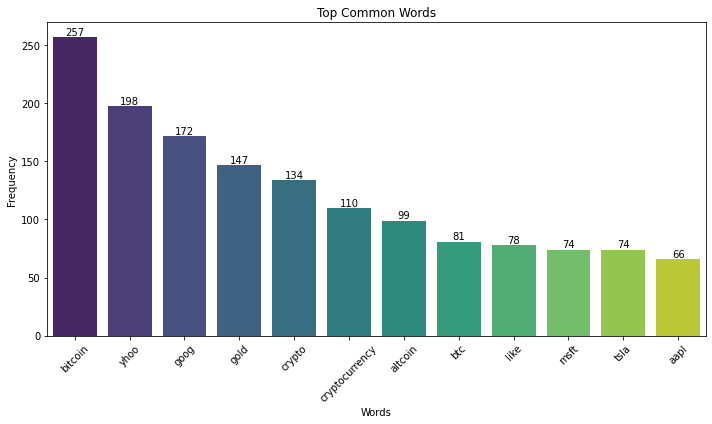

In [162]:
words = [word for word, freq in words_common]
frequencies = [freq for word, freq in words_common]

plt.figure(figsize=(10, 6))
sns.barplot(x=words, y=frequencies, palette='viridis')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Common Words')
plt.xticks(rotation=45)

for i, freq in enumerate(frequencies):
    plt.text(i, freq, str(freq), ha='center', va='bottom')

plt.tight_layout()

plt.show()


In [163]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2, 2), max_features=2000)
    bag_of_words = vec1.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    return word_freq[:n]

In [164]:
top2_words = get_top_n2_words(df['tweet_content'], n=200)
top2_df = pd.DataFrame(top2_words)
top2_df.columns =["Bi-gram","Frequency"]
top2_df.head()

,Bi-gram,Frequency
0,send dm,44
1,please send,26
2,dm promotion,25
3,pips profit,19
4,profit join,19


[Text(0, 0, 'send dm'),
 Text(1, 0, 'please send'),
 Text(2, 0, 'dm promotion'),
 Text(3, 0, 'pips profit'),
 Text(4, 0, 'profit join'),
 Text(5, 0, 'join free'),
 Text(6, 0, 'free telegram'),
 Text(7, 0, 'telegram channel'),
 Text(8, 0, 'channel link'),
 Text(9, 0, 'link bio'),
 Text(10, 0, 'bio xauusd'),
 Text(11, 0, 'xauusd eurusd'),
 Text(12, 0, 'eurusd eurjpy'),
 Text(13, 0, 'eurjpy usdcad'),
 Text(14, 0, 'usdcad usdjpy'),
 Text(15, 0, 'usdjpy gbpusd'),
 Text(16, 0, 'usoil crudeoil'),
 Text(17, 0, 'aapl spy'),
 Text(18, 0, 'amzn qqq'),
 Text(19, 0, 'qqq goog')]

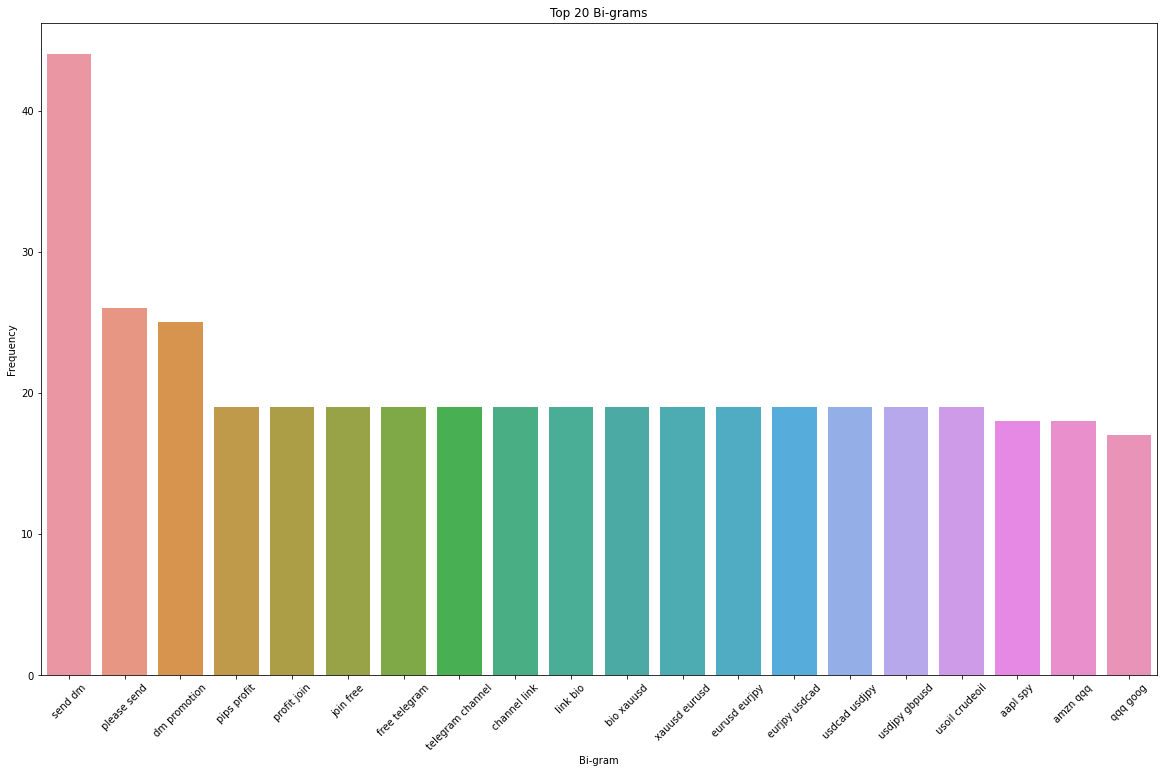

In [165]:
top20_bigram = top2_df.iloc[0:20, :]
fig = plt.figure(figsize=(20, 12))
plt.title('Top 20 Bi-grams')
plot = sns.barplot(x=top20_bigram["Bi-gram"], y=top20_bigram["Frequency"])
plot.set_xticklabels(rotation=45, labels=top20_bigram["Bi-gram"])

In [166]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3, 3), max_features=2000)
    bag_of_words = vec1.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    return word_freq[:n]

In [167]:
top3_words = get_top_n3_words(df['tweet_content'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns =["Tri-gram","Frequency"]
top3_df.head()

,Tri-gram,Frequency
0,please send dm,25
1,send dm promotion,25
2,pips profit join,19
3,profit join free,19
4,join free telegram,19


[Text(0, 0, 'please send dm'),
 Text(1, 0, 'send dm promotion'),
 Text(2, 0, 'pips profit join'),
 Text(3, 0, 'profit join free'),
 Text(4, 0, 'join free telegram'),
 Text(5, 0, 'free telegram channel'),
 Text(6, 0, 'telegram channel link'),
 Text(7, 0, 'channel link bio'),
 Text(8, 0, 'link bio xauusd'),
 Text(9, 0, 'bio xauusd eurusd'),
 Text(10, 0, 'xauusd eurusd eurjpy'),
 Text(11, 0, 'eurusd eurjpy usdcad'),
 Text(12, 0, 'eurjpy usdcad usdjpy'),
 Text(13, 0, 'usdcad usdjpy gbpusd'),
 Text(14, 0, 'amzn qqq goog'),
 Text(15, 0, 'hey seem like'),
 Text(16, 0, 'seem like good'),
 Text(17, 0, 'like good project'),
 Text(18, 0, 'good project talk'),
 Text(19, 0, 'project talk send')]

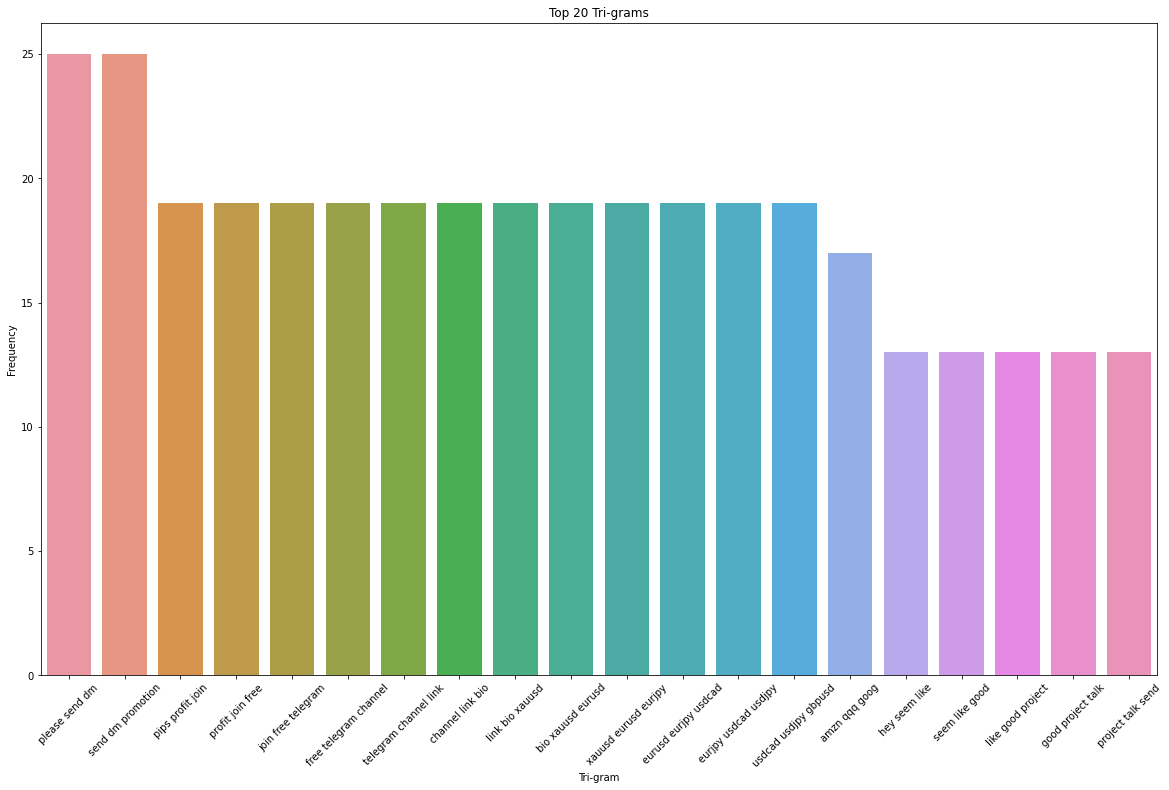

In [168]:
top20_trigram = top3_df.iloc[0:20, :]
fig = plt.figure(figsize=(20, 12))
plt.title('Top 20 Tri-grams')
plot = sns.barplot(x=top20_trigram["Tri-gram"], y=top20_trigram["Frequency"])
plot.set_xticklabels(rotation=45, labels=top20_trigram["Tri-gram"])

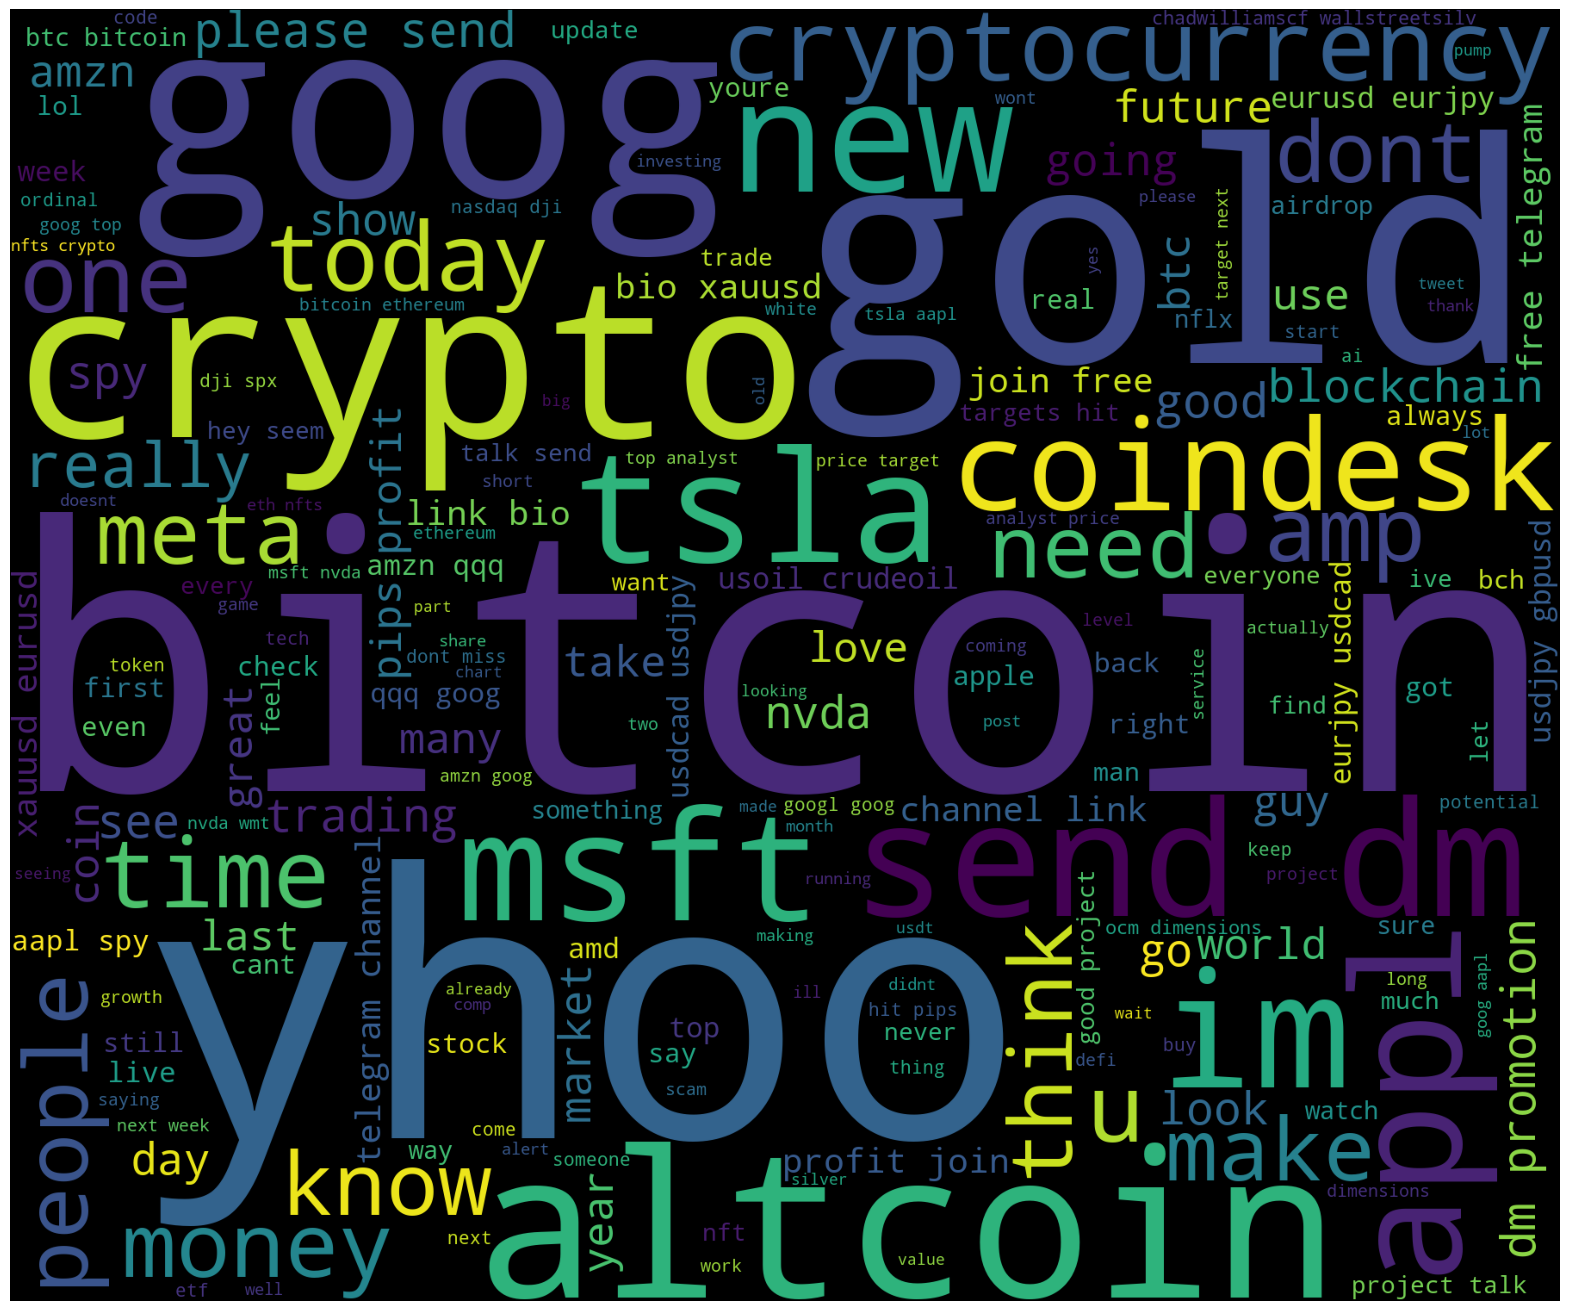

In [110]:
from wordcloud import WordCloud
wordcloud_generator = WordCloud(background_color='black', width=1800, height=1500).generate(' '.join(df['tweet_content']))
fig = plt.figure(figsize=(20, 20))
plt.imshow(wordcloud_generator)
plt.axis('off')
plt.show()

In [172]:
key_words=['Altcoin','Bitcoin','Coindesk','Cryptocurrency','Gold','APPL','YHOO','GOOG']


### Plotting Daily User Count and Daily Tweet Number for each Keyword

In [173]:
def Visualize(key_words):
    for word in key_words:
        df = pd.read_csv(word + ".csv")
        print('-------------------------------------------------')
        print('Keyword: {}'.format(word))
        print('-------------------------------------------------')
        df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date
        df = df[~df['date'].isnull()]  # Exclude rows with invalid date
        daily_user_count = df.groupby(df['date']).nunique()['user_name']
        daily_no_of_tweets = df.groupby('date')['tweet_content'].count()
        plotting(daily_user_count, daily_no_of_tweets, word)

def plotting(daily_user_count, daily_no_of_tweets, keyword):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    daily_user_count.plot(kind='bar', color='yellow')
    plt.xlabel('Date')
    plt.ylabel('Users Count')
    plt.title('Daily User count - {}'.format(keyword))

    plt.subplot(2, 2, 2)
    daily_no_of_tweets.plot(kind='bar', color='red')
    plt.xlabel('Date')
    plt.ylabel('Number of Tweets')
    plt.title('Daily Tweets Number - {}'.format(keyword))

    plt.tight_layout()
    plt.show()


-------------------------------------------------
Keyword: Altcoin
-------------------------------------------------


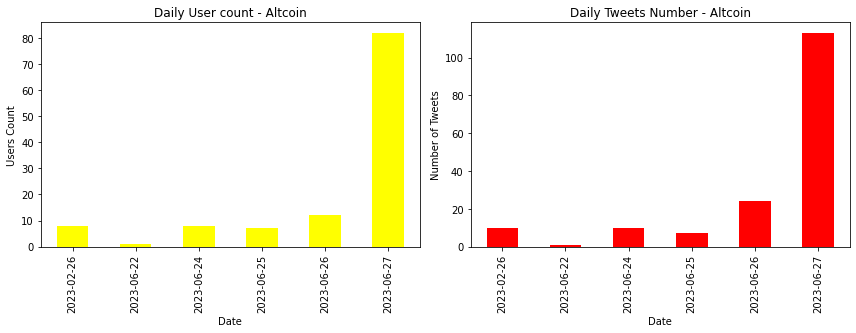

-------------------------------------------------
Keyword: Bitcoin
-------------------------------------------------


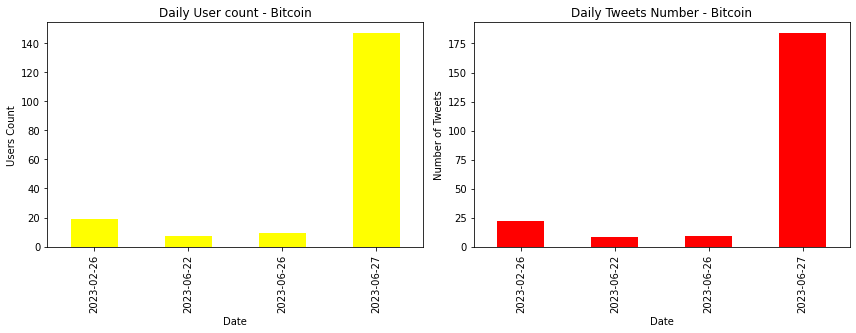

-------------------------------------------------
Keyword: Coindesk
-------------------------------------------------


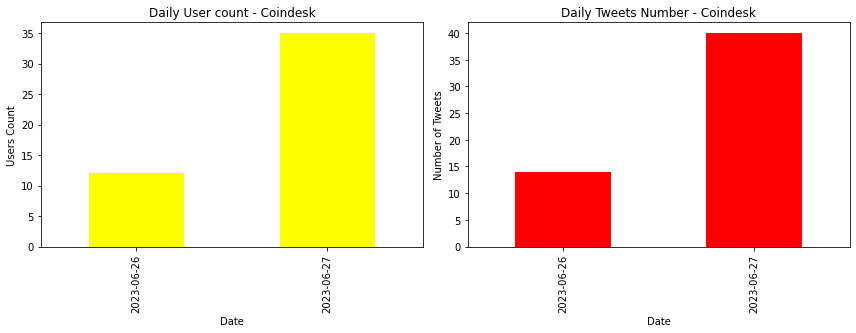

-------------------------------------------------
Keyword: Cryptocurrency
-------------------------------------------------


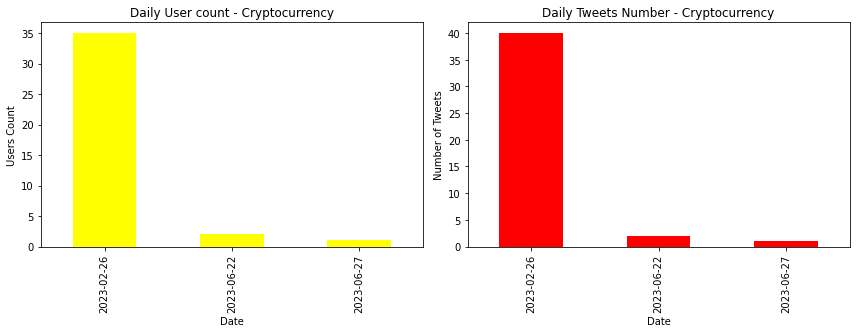

-------------------------------------------------
Keyword: Gold
-------------------------------------------------


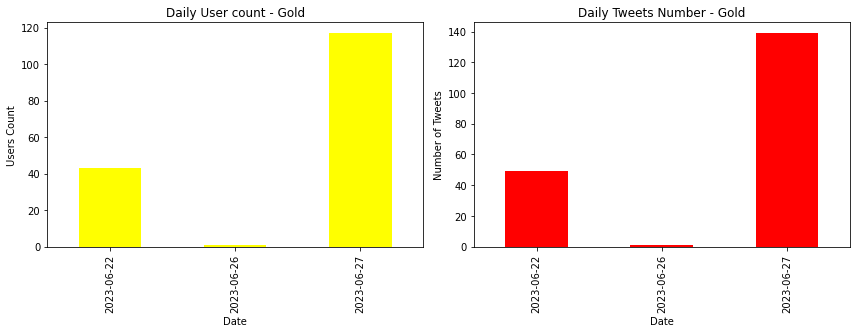

-------------------------------------------------
Keyword: APPL
-------------------------------------------------


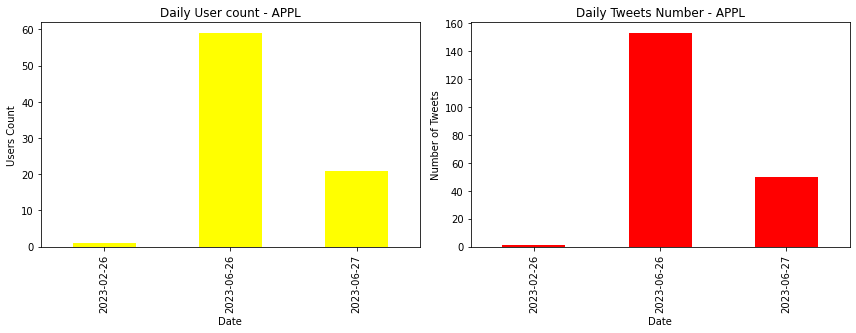

-------------------------------------------------
Keyword: YHOO
-------------------------------------------------


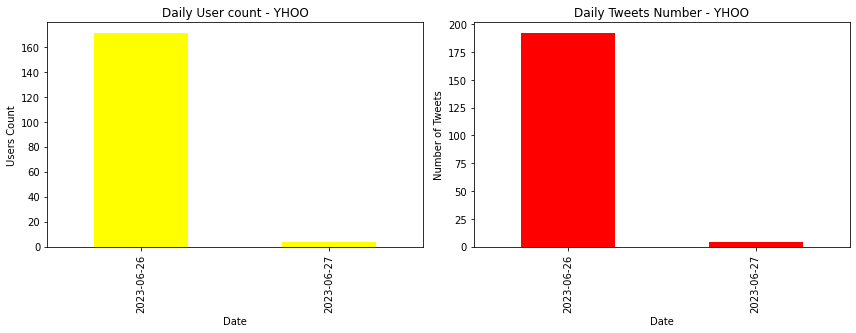

-------------------------------------------------
Keyword: GOOG
-------------------------------------------------


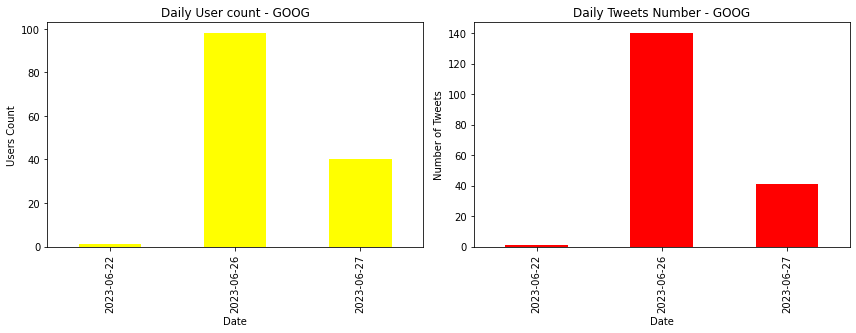

In [174]:
Visualize(key_words)

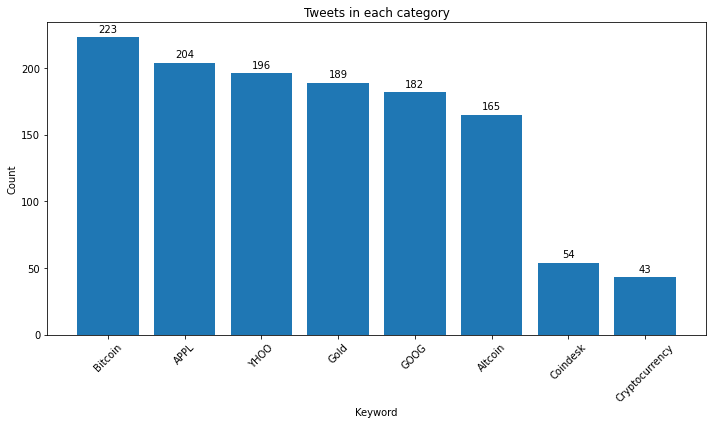

In [175]:
category_counts = df['Tweet Category'].value_counts()

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(category_counts.index, category_counts.values)

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Set the labels and title
ax.set_xlabel('Keyword')
ax.set_ylabel('Count')
ax.set_title('Tweets in each category')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()